In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler   

from sklearn.cluster import KMeans                              

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Car_sales.csv')
print(df.shape)
df.head()

(157, 16)


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
df=df.drop(['Manufacturer','Model','Vehicle_type','Latest_Launch'],axis=1)
print(df.shape)
df.head()

(157, 12)


,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sales_in_thousands   117 non-null    float64
 1   __year_resale_value  117 non-null    float64
 2   Price_in_thousands   117 non-null    float64
 3   Engine_size          117 non-null    float64
 4   Horsepower           117 non-null    float64
 5   Wheelbase            117 non-null    float64
 6   Width                117 non-null    float64
 7   Length               117 non-null    float64
 8   Curb_weight          117 non-null    float64
 9   Fuel_capacity        117 non-null    float64
 10  Fuel_efficiency      117 non-null    float64
 11  Power_perf_factor    117 non-null    float64
dtypes: float64(12)
memory usage: 11.9 KB


In [6]:
df.isnull().sum()

Sales_in_thousands     0
__year_resale_value    0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Power_perf_factor      0
dtype: int64

In [7]:
df.shape

(117, 12)

In [8]:
df.corr()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.275426,-0.251705,0.038111,-0.152538,0.406839,0.177802,0.272336,0.067184,0.138045,-0.066927,-0.175562
__year_resale_value,-0.275426,1.000000,0.954757,0.527187,0.773110,-0.053685,0.178128,0.025390,0.363274,0.324796,-0.398459,0.829511
Price_in_thousands,-0.251705,0.954757,1.000000,0.649170,0.853455,0.067042,0.301292,0.182592,0.511400,0.406496,-0.479539,0.905002
Engine_size,0.038111,0.527187,0.649170,1.000000,0.861618,0.410020,0.671756,0.537343,0.742831,0.616862,-0.724871,0.841005
Horsepower,-0.152538,0.773110,0.853455,0.861618,1.000000,0.225905,0.507275,0.400968,0.598603,0.479790,-0.595844,0.994071
Wheelbase,0.406839,-0.053685,0.067042,0.410020,0.225905,1.000000,0.675559,0.853669,0.675609,0.658654,-0.470455,0.200228
Width,0.177802,0.178128,0.301292,0.671756,0.507275,0.675559,1.000000,0.743226,0.735957,0.672191,-0.599604,0.478889
Length,0.272336,0.025390,0.182592,0.537343,0.400968,0.853669,0.743226,1.000000,0.684305,0.562504,-0.465682,0.366831
Curb_weight,0.067184,0.363274,0.511400,0.742831,0.598603,0.675609,0.735957,0.684305,1.000000,0.847994,-0.818819,0.597586
Fuel_capacity,0.138045,0.324796,0.406496,0.616862,0.479790,0.658654,0.672191,0.562504,0.847994,1.000000,-0.808506,0.478484


In [9]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df)

df_std = pd.DataFrame(df_scaled,columns=df.columns)
df_std

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,-0.564554,-0.144648,-0.317230,-1.188519,-0.707601,-0.764273,-1.106603,-1.110752,-1.152084,-1.220853,0.884790,-0.648864
1,-0.263968,0.159525,0.172510,0.143989,0.749354,0.096494,-0.253125,0.375767,0.324491,-0.162192,0.200734,0.640645
2,-0.676024,1.011901,1.137795,0.429526,0.492244,0.907361,0.059816,0.644065,0.884513,0.049540,-0.483322,0.641385
3,-0.518017,0.365480,-0.140498,-1.188519,-0.536195,-0.589625,-0.850559,-0.704679,-0.548336,-0.373924,0.656772,-0.473601
4,-0.539653,0.477976,0.566432,-0.236728,0.320838,0.171343,1.396931,0.310505,0.398488,0.181873,-0.483322,0.375435
...,...,...,...,...,...,...,...,...,...,...,...,...
112,-0.660329,-0.571701,-0.785677,-0.998161,-1.136117,-1.051195,-0.822110,-1.770621,-0.936820,-0.876788,0.428753,-1.090627
113,0.329268,-0.414639,-0.657919,-0.998161,-1.136117,-1.051195,-0.822110,-1.118003,-0.792190,-0.876788,0.428753,-1.063569
114,-0.107179,-0.113062,-0.338523,-1.188519,-0.536195,-0.115579,-0.765212,-0.262349,-0.472658,-0.373924,0.656772,-0.515542
115,-0.662898,-0.126043,-0.424405,-0.998161,-1.136117,-1.238318,-1.277298,-1.980909,-0.412115,-1.088521,0.428753,-1.014112


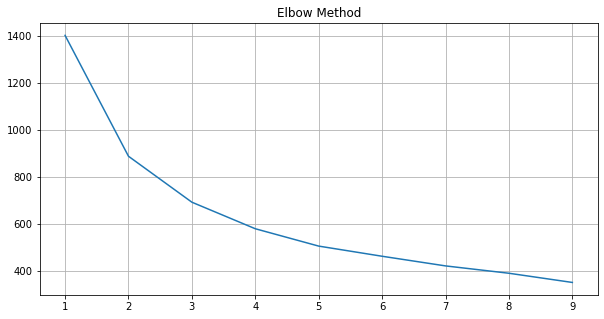

In [10]:
distortion = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(df_std)
    distortion.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize = (10,5))
plt.plot(range(1,10), distortion)
plt.grid(True)
plt.title('Elbow Method')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.15650838955793972
For n_clusters = 3 The average silhouette_score is : 0.21221671448614396
For n_clusters = 4 The average silhouette_score is : 0.25215864232518254
For n_clusters = 5 The average silhouette_score is : 0.24036044806109716
For n_clusters = 6 The average silhouette_score is : 0.14008219733597255


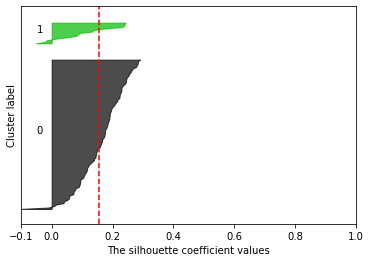

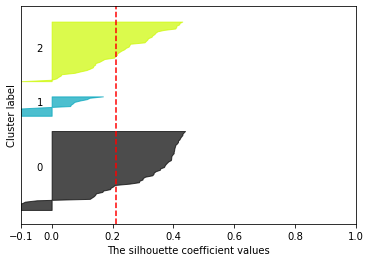

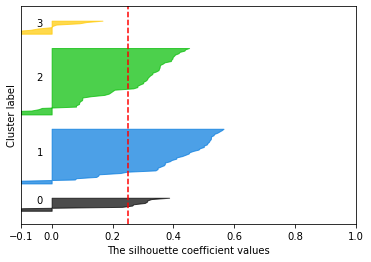

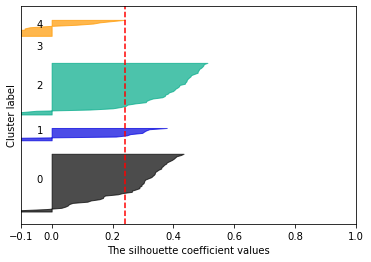

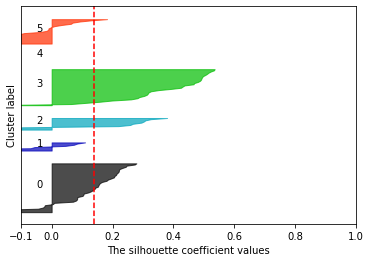

In [11]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_std) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    silhouette_avg = silhouette_score(df_std, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(df_std, cluster_labels)                 

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
    
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))                                                       
        y_lower = y_upper + 10                                         

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])                                          
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [12]:
# TASK 2
df1 = df_std[['Engine_size','Horsepower']]
kmeans = KMeans(n_clusters=4, n_init=4).fit(df1)
centroids = kmeans.cluster_centers_
print('Centroids :\n ',centroids)

Centroids :
  [[-0.89909687 -0.83353234]
 [ 1.26498792  1.48735398]
 [ 0.33823215  0.19315742]
 [ 4.71258843  4.60599941]]


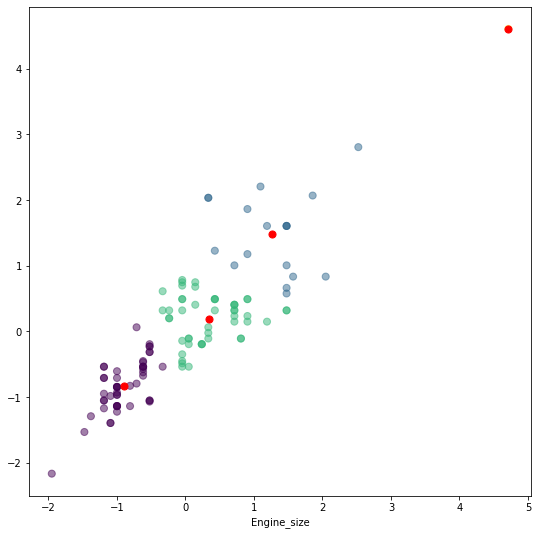

In [13]:
fig, ax = plt.subplots(figsize=(9,9))
plt.scatter(df1['Engine_size'], df1['Horsepower'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('Engine_size')
plt.show()

The four clusters based on the engine-size and horsepower are:
1. 'Economy cars' in violet.
2. 'Mid-level cars in yellow..
3. 'Racing cars' in blue.
4. 'Hyper cars' in green.


Centroids :
  [[ 1.46408248 -1.14754972]
 [-0.75756913  0.38441602]
 [ 0.21378703 -0.27050415]
 [-1.23244803  1.90210411]]


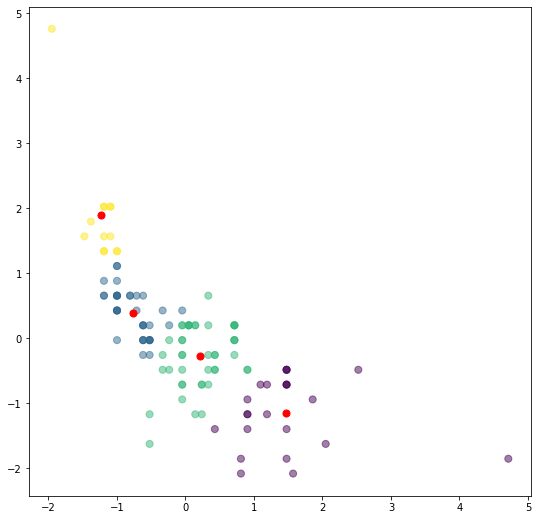

In [14]:
df1 = df_std[['Engine_size','Fuel_efficiency']]
kmeans = KMeans(n_clusters=4, n_init=4).fit(df1)
centroids = kmeans.cluster_centers_
print('Centroids :\n ',centroids)
fig, ax = plt.subplots(figsize=(9,9))
plt.scatter(df1['Engine_size'], df1['Fuel_efficiency'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [15]:
cluster_df = df_std[['Engine_size','Horsepower']]
cluster_df['Engine_size'] = df_std['Engine_size']
cluster_df['Horsepower'] = df_std['Horsepower']
cluster_df['Cluster'] = kmeans.labels_   
print('No of Cluster : ',cluster_df['Cluster'].unique())
cluster_df

No of Cluster :  [1 2 0 3]


,Engine_size,Horsepower,Cluster
0,-1.188519,-0.707601,1
1,0.143989,0.749354,2
2,0.429526,0.492244,2
3,-1.188519,-0.536195,1
4,-0.236728,0.320838,2
...,...,...,...
112,-0.998161,-1.136117,1
113,-0.998161,-1.136117,1
114,-1.188519,-0.536195,1
115,-0.998161,-1.136117,1


In [16]:
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(df)

df['cluster'] = cluster_labels

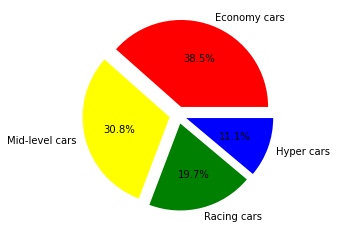

In [22]:
explode=(0.1, 0.1,0.1,0.1)
colors=['red','yellow','green','blue']
plt.pie(cluster_df['Cluster'].value_counts(), labels=['Economy cars','Mid-level cars','Racing cars','Hyper cars'], explode=explode, autopct='%1.1f%%',colors=colors)
plt.show()